# Credit Card Fraud Detection

# **Content**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



# **Data** **Analysis**

**PANDAS**:

  Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.

**NUMPY**:

It is the fundamental library of python, used to perform scientific computing. It provides high-performance multidimensional arrays and tools to deal with them. A numpy array is a grid of values (of the same type) that are indexed by a tuple of positive integers, numpy arrays are fast, easy to understand, and give users the right to perform calculations across arrays.


# **DATA** **VISUALIZATION**:

Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions.

**MATPLOTLIB**:

It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays.

**SEABORN**:
It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data.

# Import Libraries

In [82]:
import numpy as np  
import pandas as pd
#   ---------- # Visualizations---------
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [83]:
# Read csv file
df=pd.read_csv('/content/creditcard.csv')

# Exploratory Data Analysis



*   **head**()Understand your data using the head() function to look at the first few rows.

* **shape**()Review the dimensions of your data with the shape 
property.
* **info**()To know the information about the data
* **Dtyes** Look at the data types for each attribute with the dtypes property.
* **describeReview** the distribution of your data with the describe() function.
* **Correlation** Calculate pairwise correlation between your variables using the corr() function.




In [84]:
# checking first five 
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# info()

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

In [85]:
# Gives the information of Dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Interpretation:
* By understanding the info() , we can say that all the columns are float type expect class column
* There is no null values are present, we can check the memory usage i.e 31.4 MB

In [86]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 284807 rows and 31 columns are present in the Data Set


### Describe():

In [87]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Handling Missing Values**
There are broadly divide into two ways to treat missing values

Delete --> Delete the missing values
* 2.impute -->
     * imputing by a simple static: Replace the missing values by another value according to MEAN,MEDIAN,MODE
     * Predictive Techniques: Use statitical models such as K-NN,SVM etc to predict and replace missing values fillna
* Otherwise deletion is often safer and recongineed . You may loose data but will not make false predections
* Caution : Always have backup of the orginal data .if you are deleting missing values

In [88]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

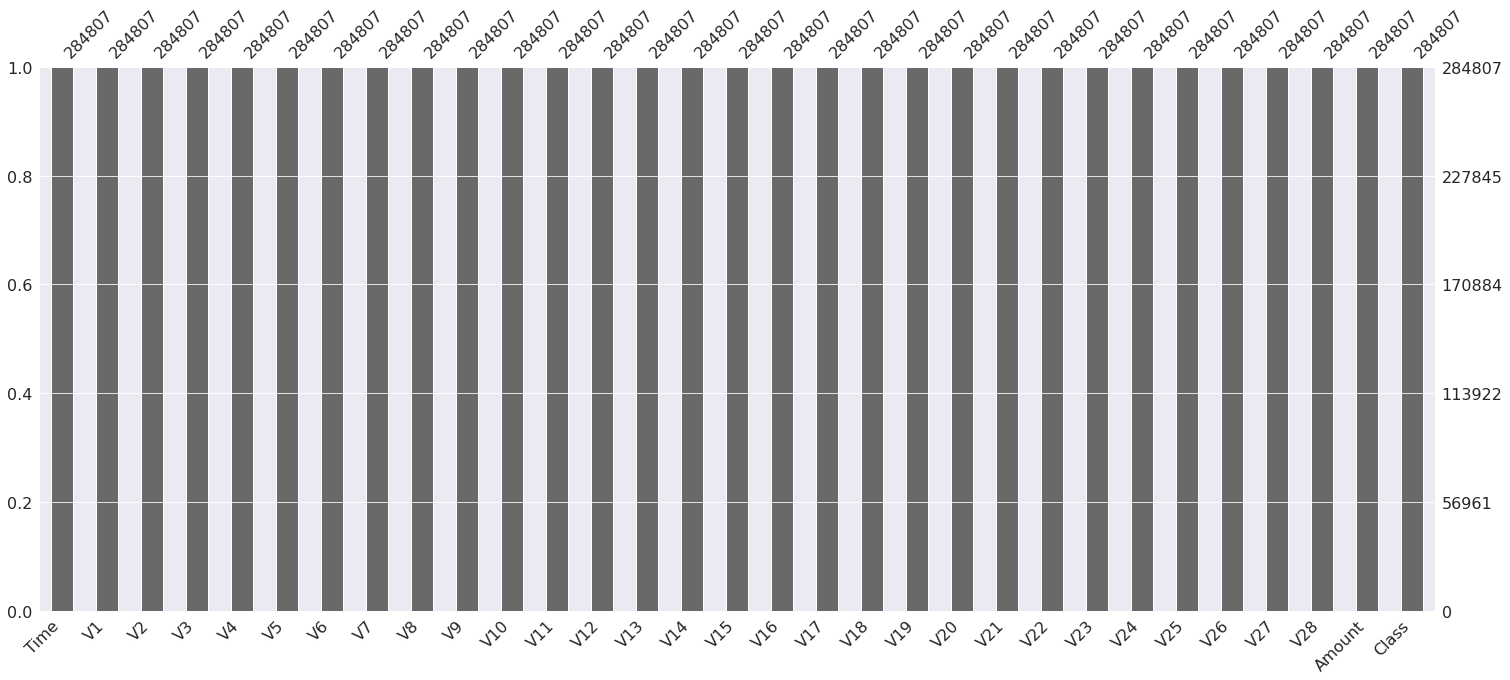

In [89]:
# plot missng values in bar graph
import missingno as msno
msno.bar(df)
plt.show()

There is no missing value in this dataset

In [90]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [91]:
# creating index in a list
lst=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

# **Histogram**

A histogram is a graphical representation of the distribution of data given by the user.
Its appearance is similar to Bar-Graph except it is continuous.
The towers or bars of a histogram are called bins.
The height of each bin shows how many values from that data fall into that range.

### **Skewed**

* These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry.
* Symmetry means that one half of the distribution is a mirror image of the other half.
* For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.

### **Normal** **Distribution**
* A normal distribution, sometimes called the bell curve.
* The bell curve is symmetrical. Half of the data will fall to the left of the mean; half will fall to the right.
* The mean, mode and median are all equal.
* The curve is symmetric at the center (i.e. around the mean, μ).
* Exactly half of the values are to the left of center and exactly half the values are to the right.
* The total area under the curve is 1.
* The Standard Normal Model
* A standard normal model is a normal distribution with a mean of 0 and a standard deviation of 1.

### **Left side skewed**

* A left-skewed distribution has a long left tail.
* Left-skewed distributions are also called negatively-skewed distributions.
* That’s because there is a long tail in the negative direction on the number line.
* The mean is also to the left of the peak.

### **Right side skewd**

* A right-skewed distribution has a long right tail.
* Right-skewed distributions are also called positive-skew distributions.
* That’s because there is a long tail in the positive direction on the number line.

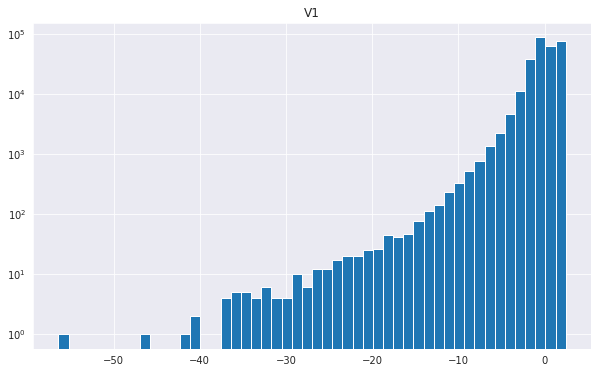

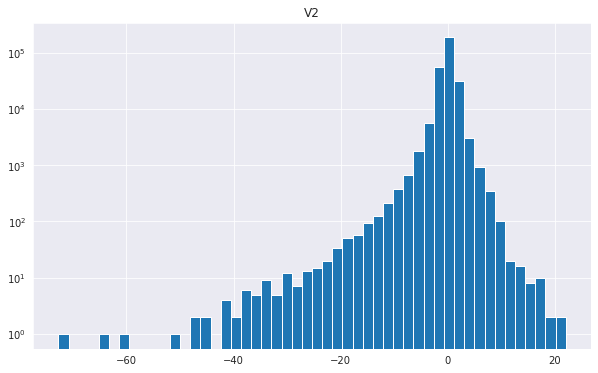

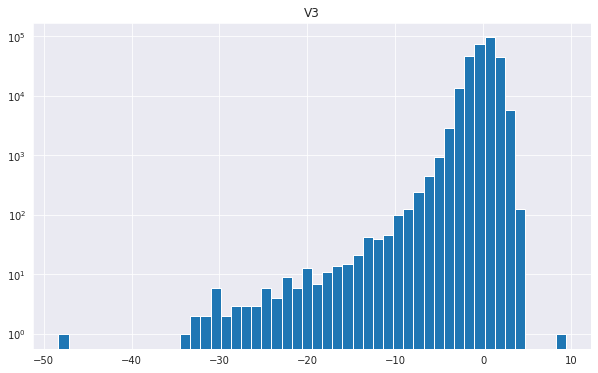

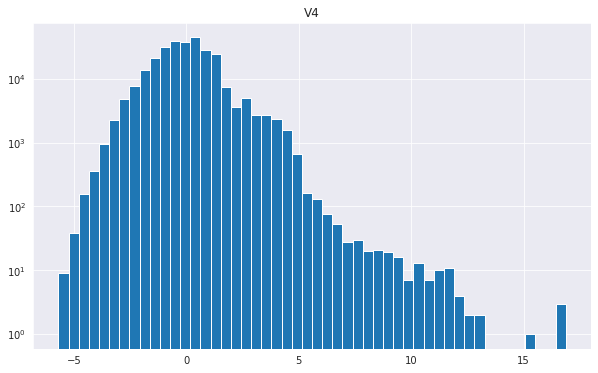

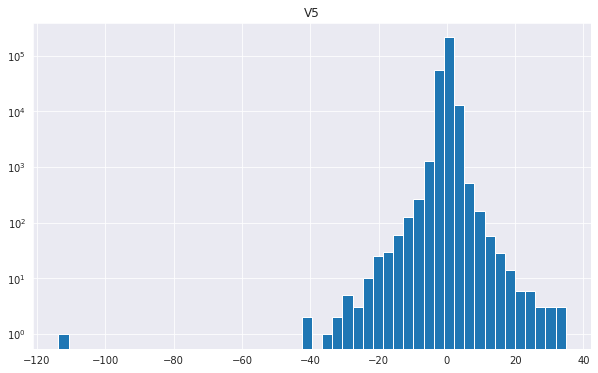

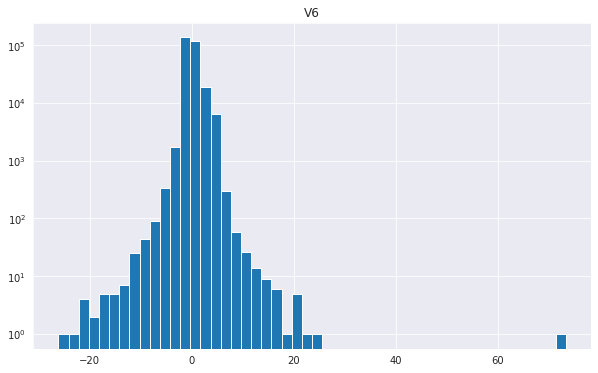

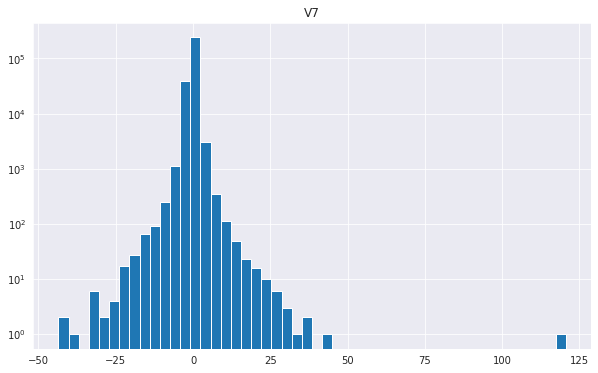

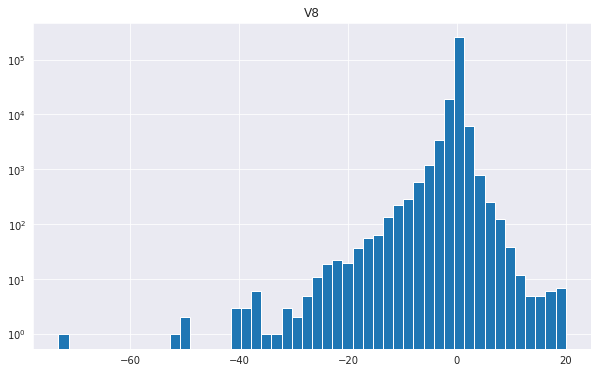

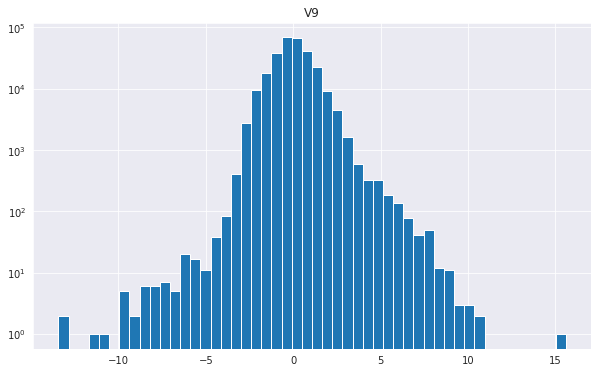

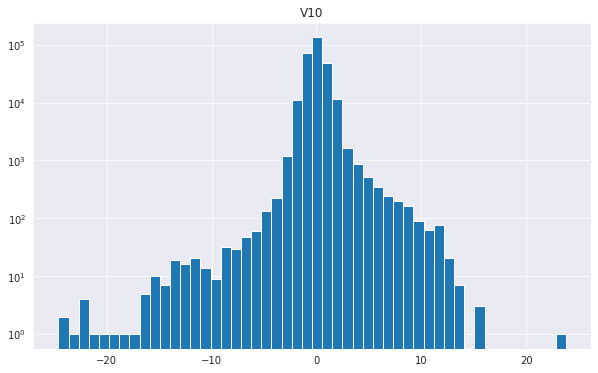

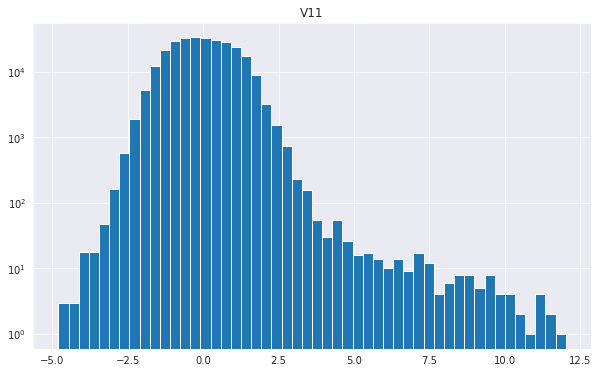

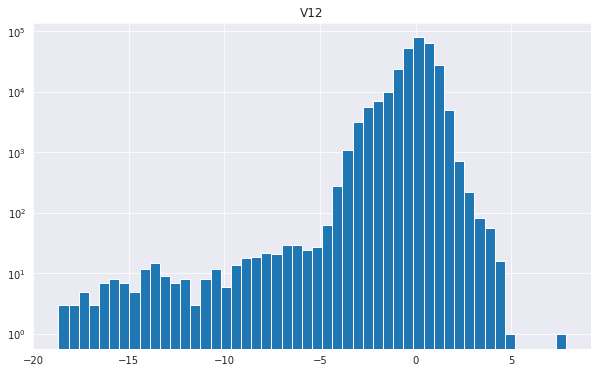

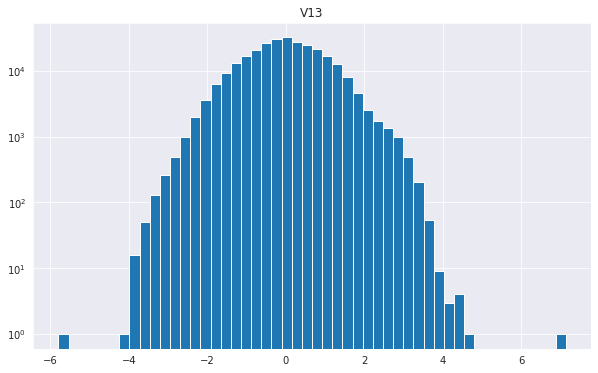

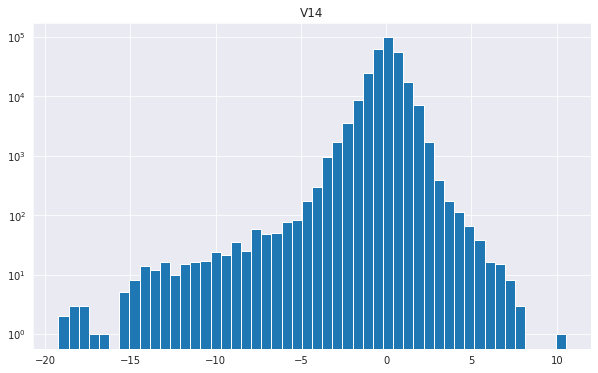

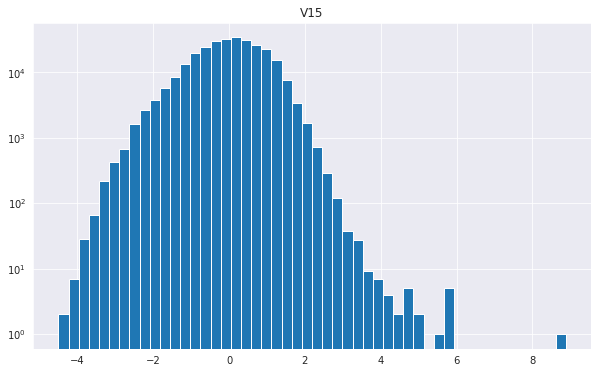

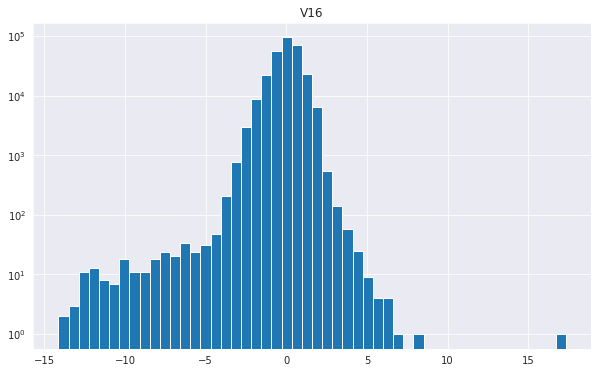

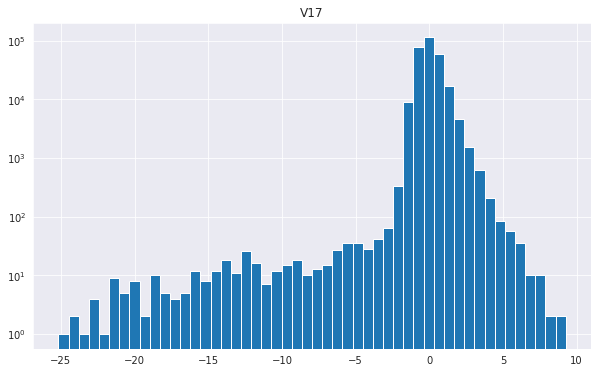

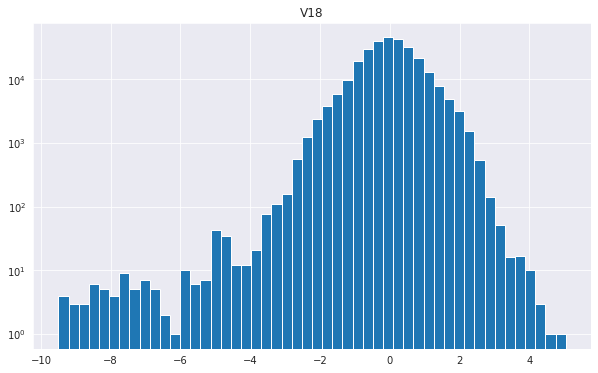

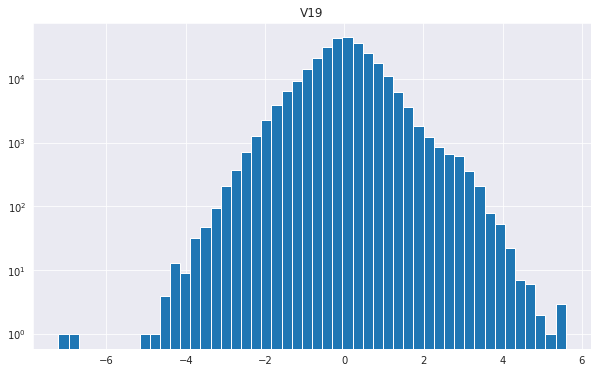

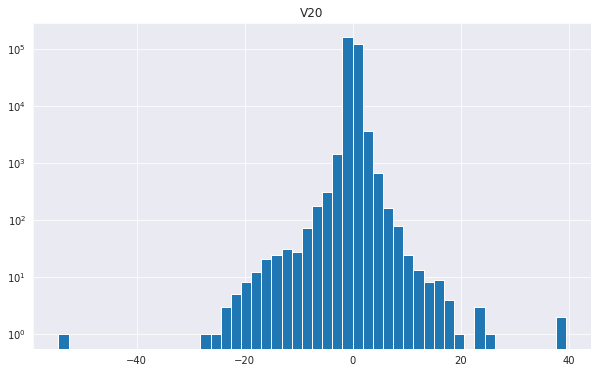

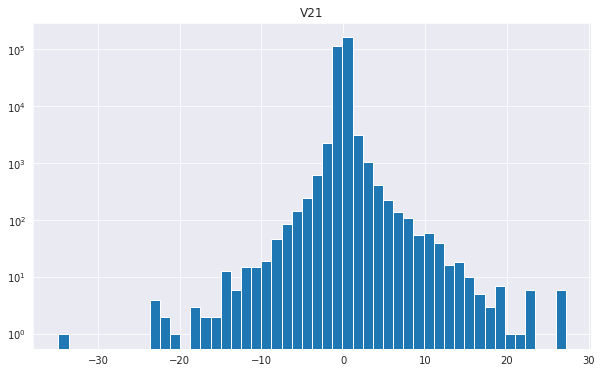

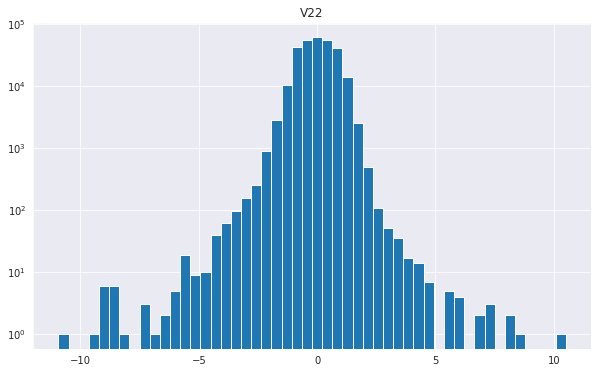

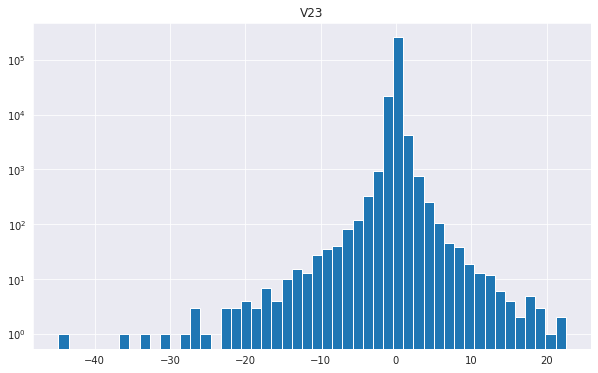

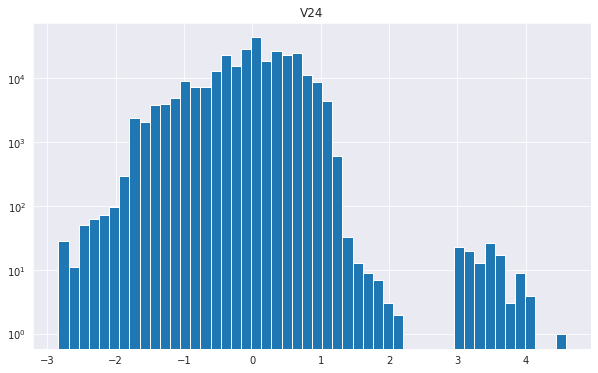

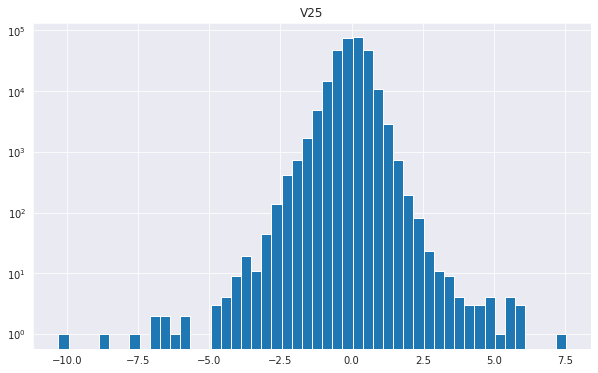

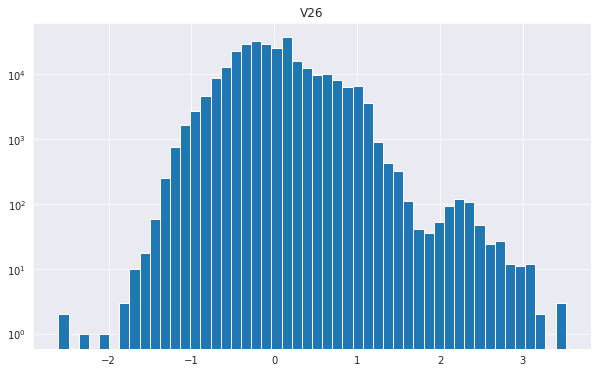

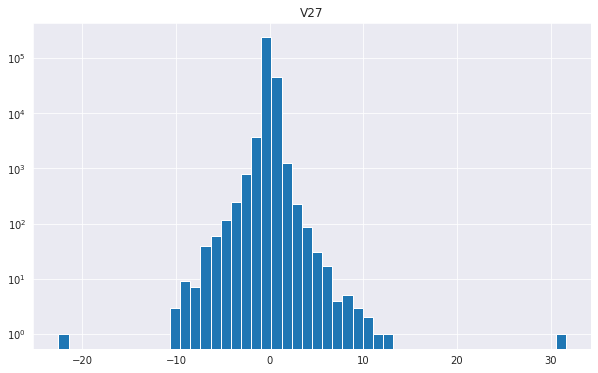

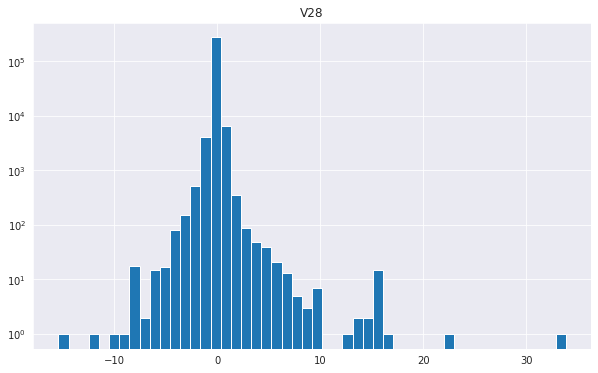

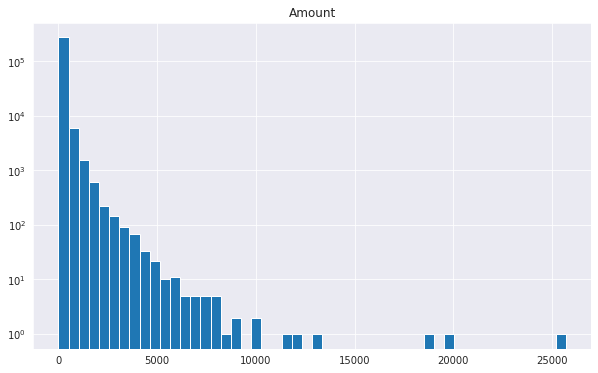

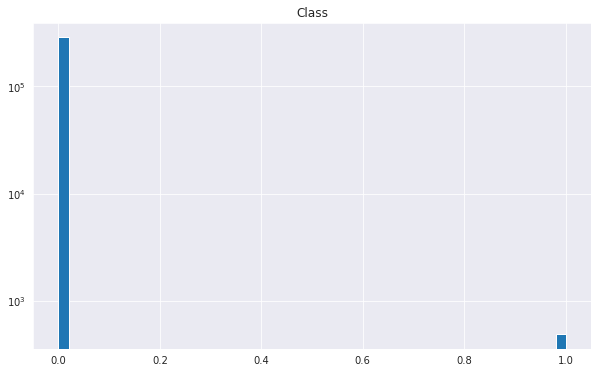

In [92]:
for i in lst[1:]: # iterating all the rows
    df[i].hist(bins=50,figsize=(10,6))
    
    # Width of each bin is = (max value of data – min value of data) / total number of bins 
    # hist means histogram, here we using with the help of matplotlib , it gives some bins to understand bars
    
    plt.yscale('log') 
    #the type of conversion of the scale, to convert y-axes to logarithmic scale we pass the “log” keyword or the matplotlib. scale
    #LogScale class to the yscale method
    plt.title(i)
    
    plt.show()

### **Interpretation**:

* V1 ---> its a left side skwed, mean is on the left, Here data points are most on left side and very few amount of outliers occurs.

* V2 ---> its looks like bell cure i.e Uniform distribution some slightly a left side skwed, mean is on the left, Here data points are most uniform and very few amount of outliers occurs.

* V3 ---> its a left side skwed mean is on the left, Here data points are most on left side and very few amount of outliers occurs

* V4 --->its looks like bell cure i.e Uniform distribution some slightly a right side skwed, mean is on the right, Here data points are most uniform and very few amount of outliers occurs on 2 bins.

* V5 ---> It looks unifrom distribution and one bin outlier far away to this data.

* V6 ---> It looks unifrom distribution and one bin outlier far away to this data.

* V7 ---> It looks unifrom distribution and one bin outlier far away to this data.

* V8 --->its looks like bell cure i.e Uniform distribution some slightly a right side skwed, mean is on the right, Here data points are most uniform and very few amount of outliers occurs on 2 bins

* V9 ---> its looks like bell cure i.e Uniform distribution some slightly a left side skwed, mean is on the left, Here data points are most uniform and very few amount of outliers occurs

* V10 ---> it looks unifrom distribution small amount of data oustide.

* V11 ---> Its a Completely Uniform Distribution

* V12--->its looks like bell cure i.e Uniform distribution some slightly a right side skwed, mean is on the right, Here data points are most uniform and very few amount of outliers occurs on 1 bin.

* V13 ---> Its a Completely Uniform Distribution

* V14 --->its looks like bell cure i.e Uniform distribution some slightly a right side skwed, mean is on the right, Here data points are most uniform and very few amount of outliers occurs on positive side aswellas neagative.

* V15 ---> It looks unifrom distribution and one bin outlier far away to this data.

* V16 ---> It looks unifrom distribution and one bin outlier far away to this data.

* V17 ---> its looks like bell cure i.e Uniform distribution some slightly a left side skwed, mean is on the left, Here data points are most uniform and very few amount of data is on left but there in group.

* V18 ---> its looks like bell cure i.e Uniform distribution some slightly a right side skwed, mean is on the right, Here data points are most uniform and very few amount of data is on right but there in group.

* V19 ---> Its a Completely Uniform Distribution

* V20 ---> Its a Completely Uniform Distribution

* V21 ---> Its a Completely Uniform Distribution

* V22 ---> Its a Completely Uniform Distribution

* V23 ---> Its a Completely Uniform Distribution

* V24 --->its looks like bell cure i.e Uniform distribution some slightly a right side skwed, mean is on the right, Here data points are most uniform and very few amount of outliers occurs on positive side.

* V25 ---> it looks unifrom distribution very small amount of data is far.

* V26 ---> it looks unifrom distribution very small amount of data is far.

* V27 ---> it looks unifrom distribution very small amount of data is far.

* V28 ---> it looks unifrom distribution very small amount of data is far.

* Amount ---> its a left side skwed, mean is on the left, Here data points are most on left side and very few amount of outliers occurs.

* Class ------> It has around not fraud 1.3 Lakhs and 1 is fraud i.e nearly 400

In [93]:
df.drop(columns=['Time','Class']) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### **Correlation** :
**HeatMap** - A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.

* It shows the relationship between two columns or variables
* If correlation is equal to zero i.e No Correlated
* If correlation is equal to one i.e Perfect Correlated
* If correlation is between less than zero to less than 0.45 i.e small positive correlated
* If correlation is between greater than 0.5 to 0.9 then it is i.e large positive correlated
* If correlation is negative to -0.45 is small neagtive correlated
* If correlation is negative between greater than - 0.5 to - 0.9 then it is i.e large negative correlated

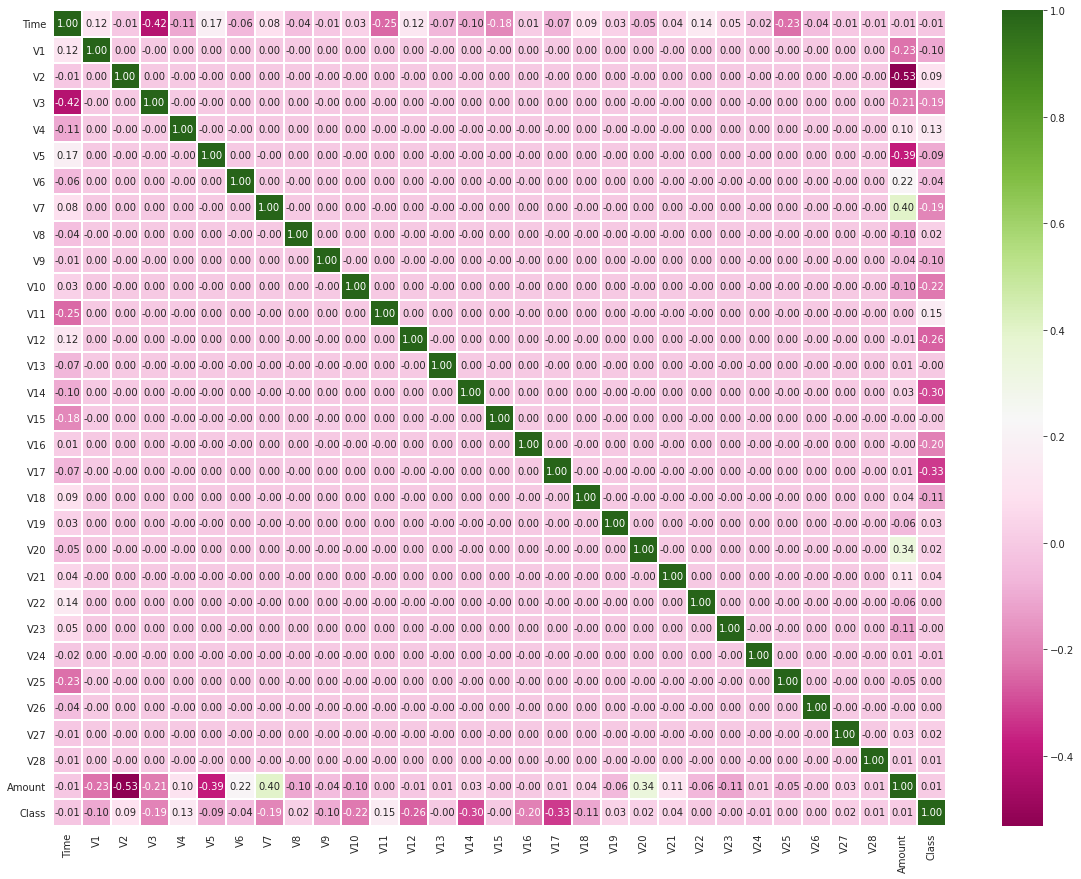

In [94]:
plt.figure(figsize=(20,15))
#plotting the figure size based on width and height

sns.heatmap(df.corr(),cmap='PiYG',annot=True,linewidths=1,fmt='0.2f')

**Interpretation**:

* V1, V3, V5, V8, V9, V10,V11, V12, V13, V14, V15, V16, V19, V22,V23, V25, V26 are small neagtive correlated with amount
* V2 is large neative correlated with amount
* V11 does not correlated with amount i.e 0.0
* V4, V6, V7, V14, V17, V18, V20,V21, V27 V28 are Small positive correlated.

In [95]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [96]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

###**countplot**():

Countplot(): method is used to Show the counts of observations in each categorical bin using bars.
###Counter
Counter is a container which stores the count of elements in a dictionary format where element is the key and its value corrosponds to it's count.


Counter({0: 284315, 1: 492})


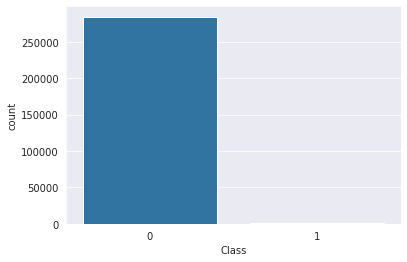

In [97]:
sns.countplot(x='Class', data = df)
from collections import Counter
counter = Counter( df [ 'Class' ])
print(counter)

There are 284315 number is not fraud and remaining 492 is fraud.

Split the dataset into training and testing

## Train_Test_Split

Train-Test Split Evaluation
The train-test split is a technique for evaluating the performance of a machine learning algorithm.
It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

In [98]:
np.random.seed(1001)
# np.random.seed   it can generate same random numbers on multiple executions of the code on the same machine

#importing train_test_split
from sklearn.model_selection import train_test_split

## split into train tests sets
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)

In [99]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((227845, 31), (56962, 31), (227845,), (56962,))

# Classification Algorithm

**KNeighborsClassifier**

* The K-Nearest Neighbors classifier (KNN) is one of the simplest yet most commonly used classifiers in supervised machine learning.
* KNN is often considered a lazy learner.
* it doesn’t technically train a model to make predictions.
* Instead an observation is predicted to be the class of that of the largest proportion of the k nearest observations. For example, if an observation with an unknown class is surrounded by an observation of class 1, then the observation is classified as class 1.

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation

In [102]:
y_pred=model.predict(x_test)

#predict the models and probabilities
y_pred_proba=model.predict_proba(x_test)[:,1]

### Confusion Matrix

**Confusion** **matrix**
A confusion matrix is a table that is often used to describe the performance of a classification model
**true positives (TP)**: These are cases in which we predicted yes (they have the disease), and they do have the disease.

**true negatives (TN):** We predicted no, and they don't have the disease.

**false positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

**false negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

**precision** - What proportion of positive identifications was actually correct?
**recall** - What proportion of actual positives was identified correctly?

**F1 Score**

* F1 Score is the weighted average of Precision and Recall
* F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

#Importing cohen_kappa_score and roc_auc_score metrices
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

#importing visualizing library
import matplotlib.pyplot as plt
import seaborn as sns

#logloss to check is there loss or difference
from sklearn.metrics import log_loss

#Creating a Function name called Classification Metric
def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    """
    Note: only for binary classification
    confusionmatrix(y_true,y_pred,labels=['No','Yes'])
    """
    # confusion matrix
    
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    
    plt.figure(figsize=(10,6))
    #plotting a fig size as 10 width and 6 height
    
    
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)
    #create a heapmap using seaborn libarary and used various parametere

    plt.xlabel('Predicted Values')
    #ploting the values on x- axis as Predicted values
    
    plt.ylabel('Actual Values')
    #ploting the values on y- axis as actual values
    
    plt.title('Confusion Matrix')
    # Mentioning the title of the figure
    
    plt.show()
    #show the image
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    #showing * are to put a  line to style
    
    #created classification report
    cr = classification_report(y_test,y_pred)
    
    #print the classifiaction report
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    
    
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    
    
    plt.figure(figsize=(8,5))
    #plot the figuare based on width and height sizes
    
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    #fpr false positive rate
    #tpr true positive rate
    
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    #fpr on x -axis 
    
    plt.ylabel('True Positive Rate')
    #tpr on y axis
    
    plt.title('Receiver Operating Characterstic')
    #mentioning the title of the figuare
    
    plt.legend(['AUC = {}'.format(roc_a)])
    #assign the legend to the figuare
    
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    #mentioning then line width as 2.0
    
    plt.grid()
    # show the grid lines to the image
    
    plt.show()
    #display the image
    
  # A point beyond which there is a change in the manner a program executes  
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

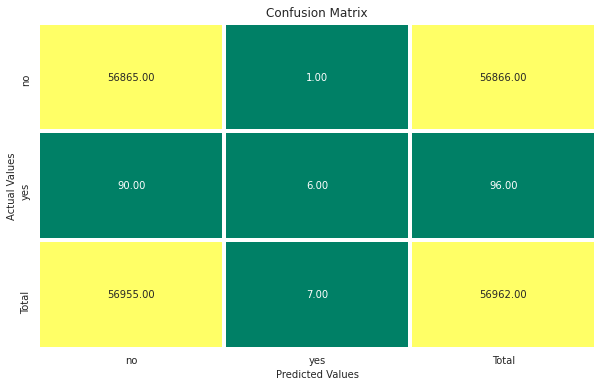

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.06      0.12        96

    accuracy                           1.00     56962
   macro avg       0.93      0.53      0.56     56962
weighted avg       1.00      1.00      1.00     56962


************************************Kappa Score************************************


Kappa Score = 0.1163024217567018

******************************Area Under Curve Score******************************


AUC Score = 0.5312412073998524
Number of probabilities to build ROC = 7


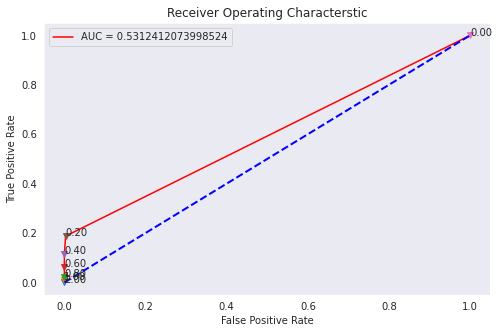

In [104]:
classification_metric(y_test,y_pred,y_pred_proba,['no','yes'],n=1,verbose=True)

##Kappa Score :

It can also be used to assess the performance of a classification model.
we know that Cohen’s kappa is a useful evaluation metric when dealing with imbalanced data
Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability
Cohen’s kappa tries to correct the evaluation bias by taking into account the correct classification by a random guess

## AUC

Its provies an aggregative measure of performance occurs all posibile classification thresholds
it talks about linearty about the dataset
AUC starts from 0 to 1
The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
## ROC (Receiver Operating Characterstic curve):

It shows the performance of the model through all thresholds
curve plot between two parameters Tpr (Sensivity) Fpr (specifity)

* Above we can understand that Kappa Score is 0.116 is very less
* AUC score is moderate i.e 0.53 , we wnat to increase
* **Reason**: The dataset is an imbalance dataset so, the kappa score and auc score are low, we can make it balanace by using some of techniques

##Solution for unbalanced dataset:
* is oversamplling techique i.e is Syntetic Minority Oversample Techique(SMOTE)
* Works based on K-NN

#Synthetic Minority Oversampling Technique

* **SMOTE:** Synthetic Minority Oversampling Technique
* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
* This algorithm helps to overcome the overfitting problem posed by random oversampling.
* It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
* General idea to carry out this technique is to bring the minority class values ( either 0 or 1 ) to a comparable number in terms of the other class . In other words to match up the length of the other class.

In [105]:
import imblearn

from imblearn.over_sampling import SMOTE

In [106]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(df,y)

In [107]:
x_resample

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.43007797e+05, -2.06901331e+00,  5.61065986e-02, ...,
         1.52060935e-01,  9.78559849e+01,  1.00000000e+00],
       [ 1.50138543e+05, -4.61310174e+00, -4.75465898e-01, ...,
         5.68768258e-02,  1.51739336e+02,  1.00000000e+00],
       [ 1.23430466e+05, -6.61621891e-01,  5.07068670e-01, ...,
        -1.99738277e-01,  9.91784435e+00,  1.00000000e+00]])

In [108]:
# Saving arrays name called credit_card_oversample
np.savez('credit_card_oversample.npz',x_resample,y_resample)

In [109]:
pd.Series(y_resample).value_counts()

1    284315
0    284315
dtype: int64

Now The data is balanced.

In [110]:
#load data what we balanced the data
data_over=np.load('credit_card_oversample.npz')
#read it
data_over.files

['arr_0', 'arr_1']

In [111]:
x_over=data_over['arr_0'] 

In [112]:
# dependent variable
y_over=data_over['arr_1'] 

In [113]:
pd.Series(y_over).value_counts()

1    284315
0    284315
dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

#Split the data into train and test , mention test_size
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)

In [115]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((454904, 31), (113726, 31), (454904,), (113726,))

In [116]:
from sklearn.neighbors import KNeighborsClassifier
model_over = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model_over.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [117]:
y_pred=model_over.predict(x_test)
#predict the model

y_pred_prob=model_over.predict_proba(x_test)[:,1]

Confusion matrix

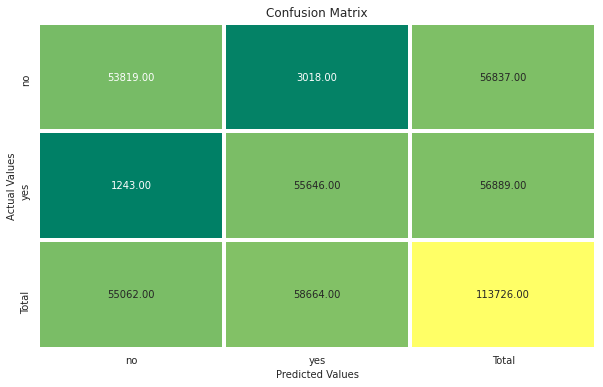

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56837
           1       0.95      0.98      0.96     56889

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726


************************************Kappa Score************************************


Kappa Score = 0.925064423112555

******************************Area Under Curve Score******************************


AUC Score = 0.9625256098797297
Number of probabilities to build ROC = 7


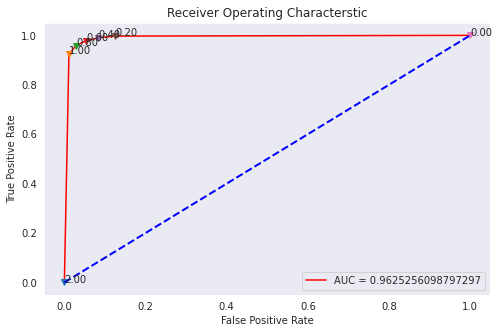

In [118]:
classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=1,verbose=True)

* We can see an improvement in the **ROC , AUC score , at k=7 -> 0.962** we get the highest ROC AUC score followed by k= 6,5,4.. and so on
* Kappa Score - 0.92
*AUC SCORE - 0.96
*F1 Score - 96

In [119]:
# KFOLD
from sklearn.model_selection import train_test_split

#split the data into train , test and mention test size
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)

In [120]:
np.random.seed(101)
from sklearn.model_selection import KFold

In [121]:
kfold=KFold(n_splits=5, shuffle=False)

In [122]:
cross_validation=[]
for train_index,test_index in kfold.split(x_train):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train_kf,x_test_kf=x_train[train_index],x_train[test_index]
    y_train_kf,y_test_kf=y_train[train_index],y_train[test_index]
    
           # building model
    
    model_cv=KNeighborsClassifier(n_neighbors=5)
    model_cv.fit(x_train_kf,y_train_kf)
    
           # taking accuracy
    acc=round(model_cv.score(x_test_kf,y_test_kf) * 100, 2)   
    cross_validation.append(acc)    

TRAIN: [ 90981  90982  90983 ... 454901 454902 454903] TEST: [    0     1     2 ... 90978 90979 90980]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [ 90981  90982  90983 ... 181959 181960 181961]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [181962 181963 181964 ... 272940 272941 272942]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [272943 272944 272945 ... 363921 363922 363923]
TRAIN: [     0      1      2 ... 363921 363922 363923] TEST: [363924 363925 363926 ... 454901 454902 454903]


In [123]:
cross_validation

[95.69, 95.62, 95.74, 95.6, 95.7]

We get good cross validation score

In [124]:
# Mean and Variance
np.mean(cross_validation),pd.Series(cross_validation).var()

(95.66999999999999, 0.003399999999999926)

# **Logistic Regression**

In [125]:
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  97.48


# **Linear Discriminent Analysis**

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Initialize the Linear Discriminant Analysis Classifier
model = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  93.29


# **GaussianNB**

In [127]:
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  86.83


# **Decision Tree**

In [128]:
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )


Accuracy of  Decision Tree Classifier :  100.0


In [129]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  100.0


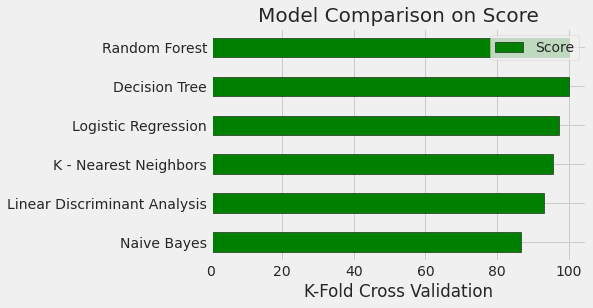

In [132]:
plt.style.use('fivethirtyeight')
figsize=(8, 6)
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest',  
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf,  acc]})

models.sort_values(by='Score', ascending=True).plot(x = 'Model', y = 'Score', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);
